# HW6 Pokemon PCA
Unsupervised transfer learning with PCA on Pokemon.

The goal of this homework is to understand principal component analysis, one of the most widely used methods for exploratory data analysis, data visualization, and dimensionality reduction. It is also a demonstration of transfer learning. 

# Instructions:
1. (4 points) Run PCA on the MNIST handwritten digit data set. You should NOT use sklearn or other packages that automate the process. Use numpy methods (you can use the np.linalg.eig function to compute the eigenvectors). An example of this analysis is provided: https://github.com/peterjsadowski/pokemon_pca
    1. Download the MNIST data set. One option is using the following code.
    
        ```
        import tensorflow_datasets as tfds
        # Use Tensorflow Datasets to download data.
        mnist_data = tfds.load("mnist")
        # Convert sample of tf dataset to numpy.
        sample = tfds.as_numpy(mnist_data["train"].batch(60000)).__next__() # Get sample.
        images = sample['image'] # images.shape = 60000,28,28,1)
        labels = sample['label'] # labels.shape = (60000, )
        ```
    
    1. Plot the sorted eigenvalues of the covariance matrix.
    1. Visualize the top 10 principal components (as images). Describe them in words. Do the principal components involve many pixels or just a few? Do any seem to correspond to particular classes?
    1. Plot reconstructions of some images using k principal components. Approximately how many principal components do you need in order to recognize the digits?

1. (6 points) Transfer learning: use the representation you learned from MNIST to reconstruct Pokemon. 
    1. Take images of pokemon, embed them in the MNIST PCA space, then map back into image space. The pokemon data set has been preprocessed as grayscale images of size 28x28.
https://github.com/peterjsadowski/pokemon_pca/blob/master/data/pokemon_mnist/pokemon_mnist_images.csv
    1. Do this for different values of k. Visualize the Pokemon reconstructions, and compare them with the reconstructions generated when the Pokemon principal components are used for the compression: https://github.com/peterjsadowski/pokemon_pca/blob/master/PokemonPCA.ipynb. 
    1. Plot the Pokemon reconstruction error as a function of k for both methods (Pokemon PCA and MNIST PCA). 



# To turn in:
A jupyter notebook containing your analysis. 







In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [ ]:
# Download the MNIST data set
(images, labels), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # x_test, y_test is unused
images = np.expand_dims(images, axis=-1)

assert images.shape == (60000, 28, 28, 1)
assert labels.shape == (60000, )

Text(0, 0.5, 'Value')

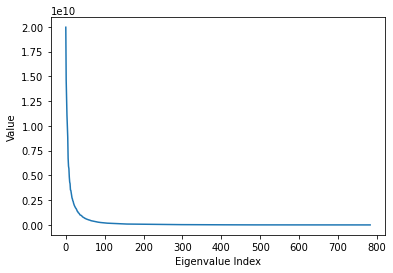

In [ ]:
# Plot the sorted eigenvalues of the covariance matrix
X = images
N = X.shape[0] # 60000
X = X.reshape(N, -1) # flatten X

assert X.shape == (60000, 784)

# Compute mean for centering
mu = np.mean(X, axis=0) # get mean of each col
X = X - mu

# Compute covariance matrix
C = X.T.dot(X)

assert C.shape == (784, 784)

# Compute eigenvalues and eigenvectors of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(C) # column v[:,i] is the eigenvector corresponding to the eigenvalue w[i]
idx = np.argsort(eigenvalues)[::-1] # get the indices that would sort the eigenvalues (in descending order)

# sort by eigenvalue
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

eigenvectors = np.real(eigenvectors) # ignore imaginary parts, if any

plt.plot(eigenvalues)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Value')

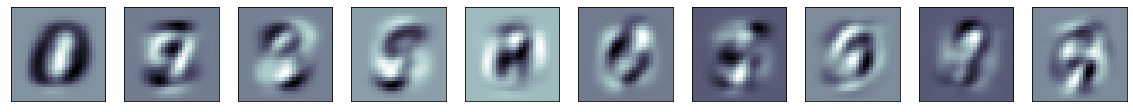

In [ ]:
# Visualize the top 10 principal components (as images)
pcs = eigenvectors[:,:10] # get the first 10 cols (PCs)
assert pcs.shape == (784, 10)

fig, axs = plt.subplots(1, 10, figsize=(20, 2),
                        subplot_kw={'xticks':[], 'yticks':[]}) # axes off
for i, ax in enumerate(axs.flat):
    ax.imshow(pcs[:,i].reshape(28, 28), cmap='bone')

Describe them in words. Do the principal components involve many pixels or just a few? Do any seem to correspond to particular classes?

The principal components have a circular outline and a shape within that somewhat resembles digits. The principal components involve just a few pixels, just the pixels within the outline. The first principal component seems to correspond to '0' or '1'. The second principal component seems to correspond to '4', '7', or '9'. Etc...

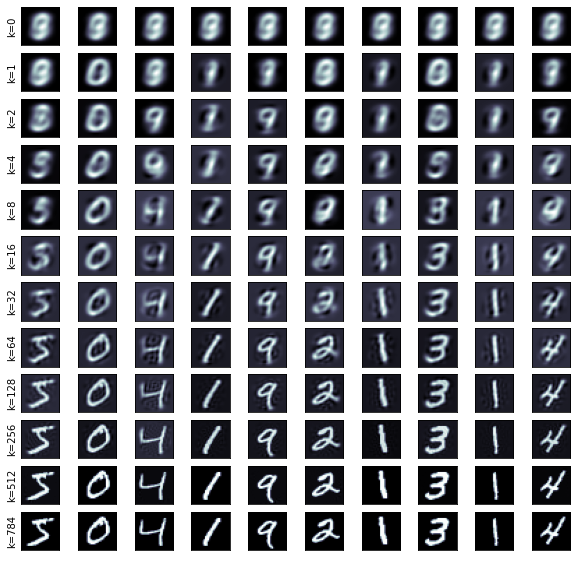

In [ ]:
# Plot reconstructions of some images using k principal components
k_values = [0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 784]
X_subset = X[:10] # get the first 10 images

fig, ax = plt.subplots(len(k_values), 10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]})
for i, k in enumerate(k_values):
    pcs = eigenvectors[:,:k] # get the first k cols (PCs)
    projected = X_subset.dot(pcs).dot(pcs.T) + mu # Map points into PC space & uncenter

    for j in range(10): # plot reconstructions for 10 images
        ax[i, j].imshow(projected[j].reshape(28, 28), cmap='bone')

    ax[i, 0].set_ylabel(f'k={k}')

Approximately how many principal components do you need in order to recognize the digits?

Approximately 64 principal components. 

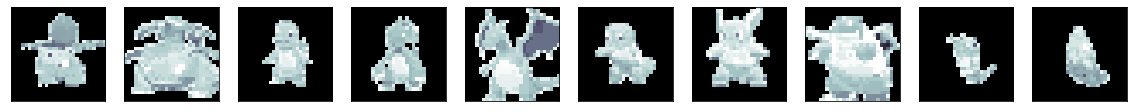

In [ ]:
# Download the Pokemon data set
url = 'https://raw.githubusercontent.com/peterjsadowski/pokemon_pca/main/data/pokemon_mnist/pokemon_mnist_images.csv'
df = pd.read_csv(url)
pokemon = df.to_numpy()
assert pokemon.shape == (808, 784)
pokemon = pokemon.reshape(808, 28, 28, 1)
assert pokemon.shape == (808, 28, 28, 1)

# Show some Pokemon images
fig, ax = plt.subplots(1, 10, figsize=(20, 2), subplot_kw={'xticks':[], 'yticks':[]}) 
for i in range(10):
    ax[i].imshow(pokemon[i,:,:,0], cmap='bone')

In [ ]:
# get Pokemon principal components
X_p = pokemon
X_p = X_p.reshape(808, -1) # flatten X_p
assert X_p.shape == (808, 784)

# Compute mean for centering
mu_p = np.mean(X_p, axis=0) # get mean of each col
X_p = X_p - mu_p

# Compute covariance matrix
C_p = X_p.T.dot(X_p)

assert C_p.shape == (784, 784)

# Compute eigenvalues and eigenvectors of covariance matrix
eigenvalues_p, eigenvectors_p = np.linalg.eig(C_p) # column v[:,i] is the eigenvector corresponding to the eigenvalue w[i]
idx = np.argsort(eigenvalues_p)[::-1] # get the indices that would sort the eigenvalues (in descending order)

# sort by eigenvalue
eigenvalues_p = eigenvalues_p[idx]
eigenvectors_p = eigenvectors_p[:,idx]

eigenvectors_p = np.real(eigenvectors_p) # ignore imaginary parts, if any

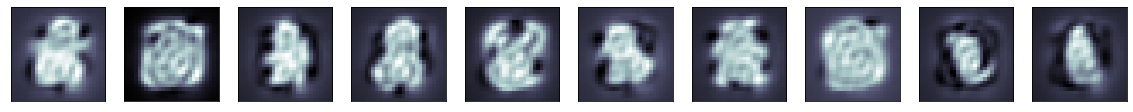

In [ ]:
# Take images of pokemon, embed them in the MNIST PCA space, then map back into image space
k = 64
X_p_subset = X_p[:10] # get the first 10 Pokemon
pcs = eigenvectors[:,:k] # get the first k cols (PCs)
projected = X_p_subset.dot(pcs).dot(pcs.T) + mu_p # Map points into PC space & uncenter

fig, ax = plt.subplots(1, 10, figsize=(20, 2), subplot_kw={'xticks':[], 'yticks':[]}) 
for i in range(10):
    ax[i].imshow(projected[i].reshape(28, 28), cmap='bone')

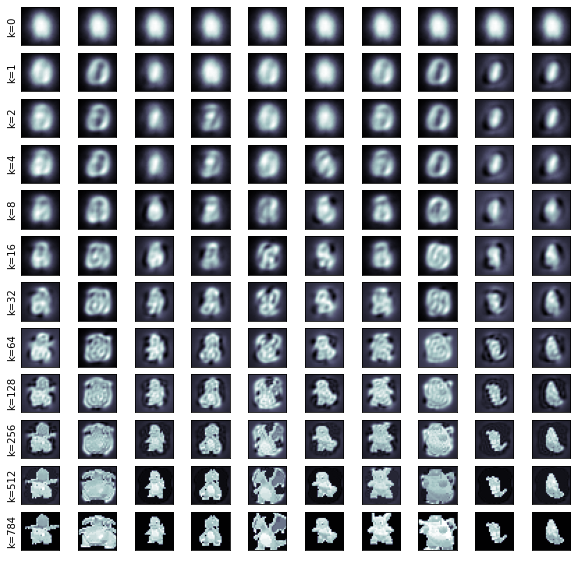

In [ ]:
# Do this for different values of k. Visualize the Pokemon reconstructions
fig, ax = plt.subplots(len(k_values), 10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]})
for i, k in enumerate(k_values):
    pcs = eigenvectors[:,:k] # get the first k cols (PCs)
    projected = X_p_subset.dot(pcs).dot(pcs.T) + mu_p # Map points into PC space & uncenter

    for j in range(10): # plot reconstructions for 10 images
        ax[i, j].imshow(projected[j].reshape(28, 28), cmap='bone')

    ax[i, 0].set_ylabel(f'k={k}')

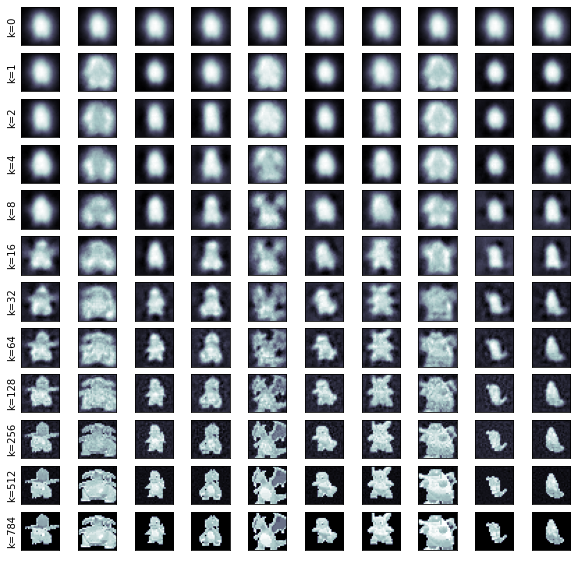

In [ ]:
# and compare them with the reconstructions generated when the Pokemon principal components are used for the compression
fig, ax = plt.subplots(len(k_values), 10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]})
for i, k in enumerate(k_values):
    pcs = eigenvectors_p[:,:k] # get the first k cols (PCs)
    projected = X_p_subset.dot(pcs).dot(pcs.T) + mu_p # Map points into PC space & uncenter

    for j in range(10): # plot reconstructions for 10 images
        ax[i, j].imshow(projected[j].reshape(28, 28), cmap='bone')

    ax[i, 0].set_ylabel(f'k={k}')

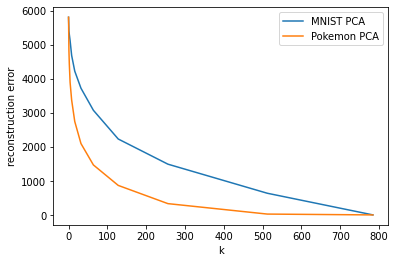

In [ ]:
# Plot the Pokemon reconstruction error as a function of k for both methods (Pokemon PCA and MNIST PCA)
errors = [] # MNIST PCA
errors_p = [] # Pokemon PCA

for k in k_values:
    # get the first k cols (PCs)
    pcs = eigenvectors[:,:k]
    pcs_p = eigenvectors_p[:,:k]

    # Map points into PC space & uncenter
    projected = X_p.dot(pcs).dot(pcs.T) + mu_p
    projected_p = X_p.dot(pcs_p).dot(pcs_p.T) + mu_p

    # calculate MSE
    errors.append( np.mean( ( (X_p + mu_p) - projected )**2 ) )
    errors_p.append( np.mean( ( (X_p + mu_p) - projected_p )**2 ) )

plt.plot(k_values, errors, label='MNIST PCA')
plt.plot(k_values, errors_p, label='Pokemon PCA')
plt.xlabel('k')
plt.ylabel('reconstruction error')
plt.legend()